In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import csv

from PIL import Image

In [8]:
path_to_csv = '../Data/'

In [21]:
shape_df = pd.read_csv(path_to_csv+'shape_image_features.csv', header=None)
cols = shape_df.columns.tolist()
cols[0] = 'aid'
shape_df.columns = cols
shape_df.head()

,aid,1,2,3,4,5,6,7
0,a1947_001,-24.289105,-52.966691,-76.443157,-76.342363,-152.854868,-102.840252,-153.508424
1,a1947_003,-23.815709,-50.478495,-76.903112,-77.997052,0.000000,-103.369052,-157.206856
2,a1947_006,-23.908530,-50.446228,-78.515327,-77.909604,0.000000,-103.509034,0.000000
3,a1948_001,-23.962045,-51.458690,-75.996623,-76.114295,-152.324429,-101.845037,0.000000
4,a1949_001,-22.833794,-47.824101,-73.780008,-74.710858,-151.071637,0.000000,-148.963616


In [22]:
color_df = pd.read_csv(path_to_csv+'image_features.csv', header=None)
cols = color_df.columns.tolist()
cols[0] = 'aid'
color_df.columns = cols
color_df.head()

,aid,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,a1947_001,0.010592,0.015700,0.032584,0.018566,0.040684,0.000810,0.023301,0.052085,0.000125,...,0.000000,0.000068,0.000068,0.0,0.000023,0.0,0.0,0.0,0.0,0.0
1,a1947_003,0.004628,0.002396,0.011955,0.086542,0.014932,0.000907,0.138686,0.049260,0.004698,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,a1947_006,0.000000,0.000059,0.010199,0.000000,0.001976,0.003755,0.000277,0.003162,0.002747,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,a1948_001,0.008650,0.001419,0.023708,0.036706,0.009749,0.015698,0.051901,0.044486,0.025355,...,0.000146,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,a1949_001,0.001044,0.000019,0.010057,0.001683,0.003384,0.000000,0.002340,0.006866,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [23]:
texture_df = pd.read_csv(path_to_csv+'texture_description_vectors.csv', header=None)
cols = texture_df.columns.tolist()
cols[0] = 'aid'
texture_df.columns = cols
texture_df.head()

,aid,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600
0,a1947_001,9029.294528,2453.654865,3458.429095,6686.381712,10833.049440,8521.971044,4673.764094,2489.601432,7536.838463,...,2022.020894,1932.223183,1771.682181,2831.971071,4824.921917,5770.738396,3374.102922,2132.642709,1694.364041,1659.107377
1,a1947_003,6515.044217,1265.000554,1183.140857,1910.971434,2335.268055,2849.006057,2404.960308,1982.536637,9006.834818,...,2310.438005,16108.167772,1881.342561,1642.649139,2190.535608,4763.109601,1707.645108,1849.473043,1736.256752,6788.456093
2,a1947_006,11573.275359,3503.504149,2964.463752,4549.120650,6321.888725,6645.793452,5673.616343,4636.338849,13001.967765,...,2134.932034,3465.098752,3716.847330,3485.341452,3720.627355,4368.483370,2859.081846,2069.710311,2326.756053,2839.085073
3,a1948_001,6957.175195,1308.805561,1678.486494,1989.579478,2797.016105,4414.930787,4803.336256,3034.151124,8098.161018,...,1461.358907,1839.205001,1653.983857,1707.730241,1596.559509,1623.650438,1529.116788,1294.232557,1370.178310,1546.697959
4,a1949_001,656.490299,511.909078,636.638441,527.648538,16621.432961,467.810906,567.792413,457.949737,580.147083,...,715.414367,5239.929245,386.456033,603.650128,562.885716,4026.415069,711.452435,554.533896,390.647883,3656.209982


In [26]:
shape_df.shape, color_df.shape, texture_df.shape

((637, 8), (637, 1441), (637, 3601))

In [27]:
temp_merg = pd.merge(shape_df, color_df, on='aid')
merged = pd.merge(temp_merg, texture_df, on='aid')
merged.head()

,aid,1_x,2_x,3_x,4_x,5_x,6_x,7_x,1_y,2_y,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600
0,a1947_001,-24.289105,-52.966691,-76.443157,-76.342363,-152.854868,-102.840252,-153.508424,0.010592,0.015700,...,2022.020894,1932.223183,1771.682181,2831.971071,4824.921917,5770.738396,3374.102922,2132.642709,1694.364041,1659.107377
1,a1947_003,-23.815709,-50.478495,-76.903112,-77.997052,0.000000,-103.369052,-157.206856,0.004628,0.002396,...,2310.438005,16108.167772,1881.342561,1642.649139,2190.535608,4763.109601,1707.645108,1849.473043,1736.256752,6788.456093
2,a1947_006,-23.908530,-50.446228,-78.515327,-77.909604,0.000000,-103.509034,0.000000,0.000000,0.000059,...,2134.932034,3465.098752,3716.847330,3485.341452,3720.627355,4368.483370,2859.081846,2069.710311,2326.756053,2839.085073
3,a1948_001,-23.962045,-51.458690,-75.996623,-76.114295,-152.324429,-101.845037,0.000000,0.008650,0.001419,...,1461.358907,1839.205001,1653.983857,1707.730241,1596.559509,1623.650438,1529.116788,1294.232557,1370.178310,1546.697959
4,a1949_001,-22.833794,-47.824101,-73.780008,-74.710858,-151.071637,0.000000,-148.963616,0.001044,0.000019,...,715.414367,5239.929245,386.456033,603.650128,562.885716,4026.415069,711.452435,554.533896,390.647883,3656.209982


In [28]:
merged.shape[1]

5048

In [29]:
cols = ['aid'] + [i for i in range(1, merged.shape[1])]
len(cols)

5048

In [30]:
merged.columns = cols
merged.head()

,aid,1,2,3,4,5,6,7,8,9,...,5038,5039,5040,5041,5042,5043,5044,5045,5046,5047
0,a1947_001,-24.289105,-52.966691,-76.443157,-76.342363,-152.854868,-102.840252,-153.508424,0.010592,0.015700,...,2022.020894,1932.223183,1771.682181,2831.971071,4824.921917,5770.738396,3374.102922,2132.642709,1694.364041,1659.107377
1,a1947_003,-23.815709,-50.478495,-76.903112,-77.997052,0.000000,-103.369052,-157.206856,0.004628,0.002396,...,2310.438005,16108.167772,1881.342561,1642.649139,2190.535608,4763.109601,1707.645108,1849.473043,1736.256752,6788.456093
2,a1947_006,-23.908530,-50.446228,-78.515327,-77.909604,0.000000,-103.509034,0.000000,0.000000,0.000059,...,2134.932034,3465.098752,3716.847330,3485.341452,3720.627355,4368.483370,2859.081846,2069.710311,2326.756053,2839.085073
3,a1948_001,-23.962045,-51.458690,-75.996623,-76.114295,-152.324429,-101.845037,0.000000,0.008650,0.001419,...,1461.358907,1839.205001,1653.983857,1707.730241,1596.559509,1623.650438,1529.116788,1294.232557,1370.178310,1546.697959
4,a1949_001,-22.833794,-47.824101,-73.780008,-74.710858,-151.071637,0.000000,-148.963616,0.001044,0.000019,...,715.414367,5239.929245,386.456033,603.650128,562.885716,4026.415069,711.452435,554.533896,390.647883,3656.209982


In [ ]:
class SimilarityRanking:
    def __init__(self, indexPath):
        """
        Set directory path for the file of image vectors.
        
        ----------
        Parameters
        ----------
        indexPath : srting, directory path to image vectors.
        
        return    : Doesn't return anythin just sets the indexPath variable
        """
        # set the indexPath to where the image vector file is
        self.indexPath = indexPath
        
        
    def search(self, queryFeatures, metric = 'chi-squared', limit = 5):
        """
        
        """
        
        # initialize results dictionary
        results = {}
        
        # open the file to read image vectors
        with open(self.indexPath) as f:
            # initiate the CSV reader
            reader = csv.reader(f)
            
            # loop over the rows
            for row in reader:
                # parse out the image ID and feature vector, then compute
                # the distance between features in our file and the image
                # being queried
                features = [float(x) for x in row[1:]]
                
                # calculate the distance from the image and the query image
                # default chi-squared but user can choose between those below
                if metric == 'chi-squared':
                    dist = self.chi2_distance(features, queryFeatures)
                elif metric == 'euclidean':
                    pass
                elif metric == 'cosine':
                    pass
                elif metric == 'minkowski':
                    pass
                
                # once we have the distance, upadte results dictionary using
                # the image ID as the key and the distance as the value, the
                # distance represents similar of the image to the query image
                results[row[0]] = dist
                
            # close the reader
            f.close
            
        # sort the results smallest to largest
        results = sorted( [(v, k) for (k, v) in results.items()] )
        
        # return the results limited by limit parameter
        return results[1:limit]
                
    
    def chi2_distance(self, histA, histB, eps = 1e-10):
        """
        
        """
        
        # compute the chi-squared distance
        dist = 0.5 * np.sum( [ ((a - b) ** 2) / (a + b + eps) 
                              for (a, b) in zip(histA, histB) ] )
        
        # return the chi-squared distance
        return dist
        
        

## Calculating similarity
1. set query (which row we are looking at)
2. loop through the rest of the paintings calculating similarity to query
3. sort similarity scores and save the IDs for the 5 most similar
4. build spreadsheet of top 5 comps for each painting ( ID, comp1, comp2, comp3, comp4, comp5 )

In [42]:
def chi2_distance(histA, histB, eps = 1e-10):
        # compute the chi-squared distance
        dist = 0.5 * np.sum( [ ((a - b) ** 2) / (a + b + eps) 
                              for (a, b) in zip(histA, histB) ] )
        
        # return the chi-squared distance
        return dist

In [81]:
merged['aid'][merged['aid']=='a1983_006']

294    a1983_006
Name: aid, dtype: object

In [111]:
#
comps = []

#
for i in range(len(merged)):
    
    #
    aid = merged['aid'].at[i]
    query = merged.iloc[i, 1:].tolist()
    
    #
    results = {}
    
    #
    for j in range(len(merged)):
        features = merged.iloc[j, 1:].tolist()
        dist = chi2_distance(query, features)

        results[merged['aid'].at[j]] = dist

    # sort the results smallest to largest
    results = sorted( [(v, k) for (k, v) in results.items()] )

    #
    results[0] = aid
    results = results[:7]
    comps.append(results)

In [212]:
comps[555]

['a2000_010',
 (33234.41950291135, 'a2001_020'),
 (36253.82822149377, 'a1999_023'),
 (38837.88802014584, 'a1996_012'),
 (39317.73282874419, 'a1991_006'),
 (40295.06719331129, 'a1989_017'),
 (41974.02566145771, 'a1999_026')]

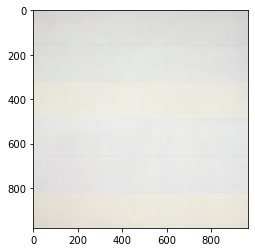

In [213]:
img = Image.open('../Paintings/2000.010.png')
plt.imshow(img);

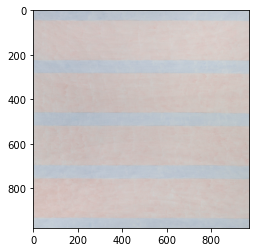

In [211]:
img = Image.open('../Paintings/1995.017.png')
plt.imshow(img);

In [204]:
full_comps = []

for i in range(len(comps)):
    aid = comps[i][0]
    temp = []
    for j in range(1,6):
        comp = comps[i][j][1]
        temp.append(comp)
    all_sim = [aid] + temp
    full_comps.append(all_sim)
    
    
full_comps[500]

['a1998_010', 'a1995_017', 'a1998_009', 'a1980_017', 'a1990_007', 'a1958_006']

In [200]:
test_df = pd.DataFrame(full_comps, columns=['aid', '1', '2', '3', '4', '5'])
test_df.head()

,aid,1,2,3,4,5
0,a1947_001,a1994_001,a1962_010,a1961_032,a1962_013,a2002_026
1,a1947_003,a1996_022,a2001_007,a2003_016,a1960_103,a1965_010
2,a1947_006,a1962_010,a2002_026,a2003_012,a1999_046,a1999_045
3,a1948_001,a2001_003,a1999_046,a2003_012,a2001_001,a1999_045
4,a1949_001,a1998_014,a1957_017,a1984_002,a2000_002,a1957_002


In [201]:
test_df.to_csv('top_5_sim.csv', index=False)